In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.integrate import quad
from optims.NMDS_particles import NMDS_particles
from optims.extended_function import extended_function

np.random.seed(42)

In [2]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      return (np.cos(x**2) + x/5 + 1).sum()

In [3]:
def create_sim(k=3, sigma=-1, save_fig=None):

  bounds = np.array([(0, 5)])

  optim = NMDS_particles(bounds, 10_000, k_iter=[k], svgd_iter=100, lr=0.1, adam=True)

  F = Fun()
  F_ext = extended_function(F, bounds)
  _best, xs, _fs = optim.optimize(F_ext, sigma=sigma)

  paths = np.array(optim.paths)

  # plt.style.use("seaborn-v0_8")

  plt.hist(xs.flatten(), density=True, bins=50, label="NMDS histogram")

  colors = cm.rainbow(np.linspace(0, 1, paths.shape[1]))
  for i in range(paths.shape[0]):
    for j in range(paths.shape[1]):
      plt.scatter(paths[i][j], Fun()(paths[i][j]), color=colors[j])

  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]
  m_k = lambda x : np.exp(-k*F(x)) / integral

  x = np.linspace(bounds[0, 0], bounds[0, 1], 500)
  plt.plot(x, [F(np.array([x_i])) for x_i in x], label="$f$")
  plt.plot(x, [m_k(np.array([x_i])) for x_i in x], label="$m^{(k)}$")

  plt.xlim(bounds[0, 0], bounds[0, 1])
  plt.legend()
  plt.title(f"k = {k}")
  plt.grid(True, ls="--")

  if save_fig != None:
    plt.savefig(save_fig, dpi=300, bbox_inches="tight")

  plt.show()


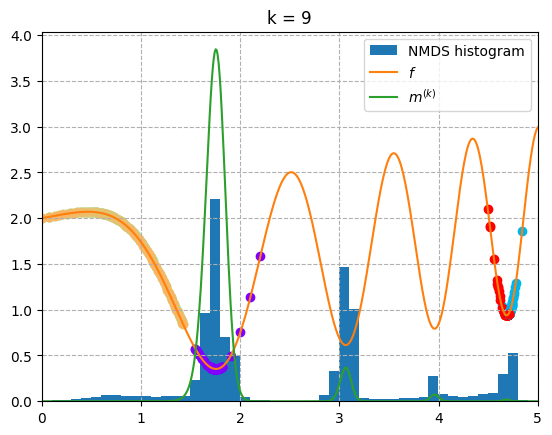

In [4]:
create_sim(k=9, sigma=0.42)

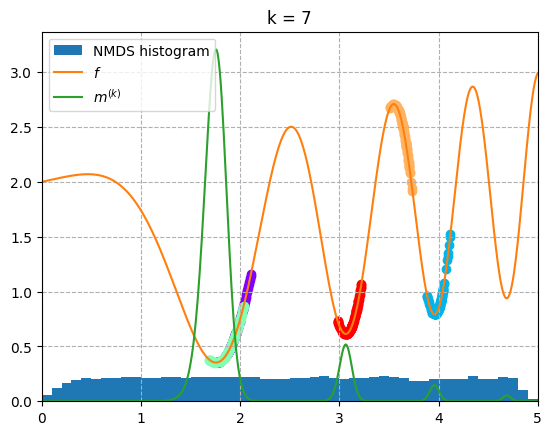

In [5]:
create_sim(k=7, sigma=10)

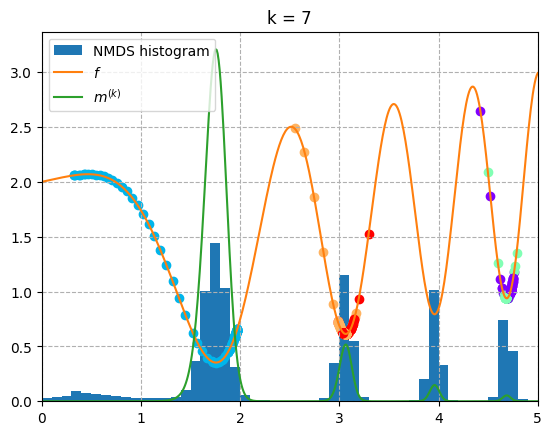

In [6]:
create_sim(k=7, sigma=0.05)

In [ ]:
create_sim(k=3, save_fig="figures/NMDS_Boltzmann_3.svg")

In [ ]:
create_sim(k=15, save_fig="figures/NMDS_Boltzmann_15.svg")